1. Importing Libraries

In [3]:
#Importing Data and Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path
path = r'/Users/mac/Documents/01-2022 Instacart Basket Analysis'

2.Importing Merged Data

In [5]:
#Importing Merged Data
ords_prods_merge = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged.csv'), index_col = False)

3. Creating Bar Chart

<AxesSubplot:>

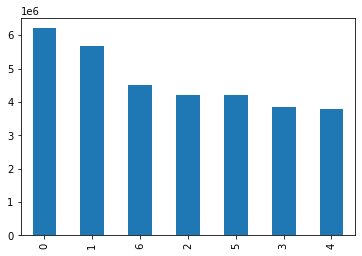

In [8]:
# Creating Bar Chart
ords_prods_merge['order_dow'].value_counts().plot.bar()

<AxesSubplot:>

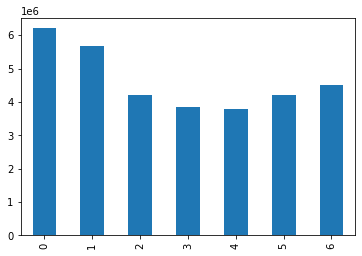

In [9]:
# Creating Bar Chart without sorting
ords_prods_merge['order_dow'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

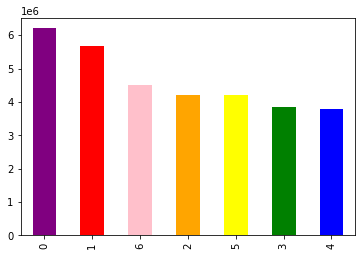

In [10]:
# Creating Bar Chart with colors
ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

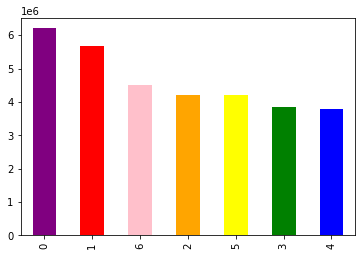

In [12]:
bar = ords_prods_merge['order_dow'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [15]:
# Exporting the bar
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_dow.png'))

4. Creating Histogram

<AxesSubplot:ylabel='Frequency'>

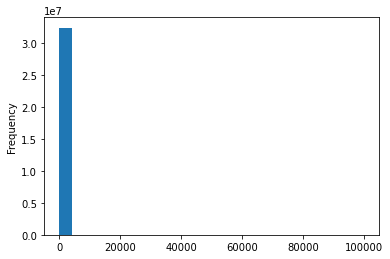

In [16]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

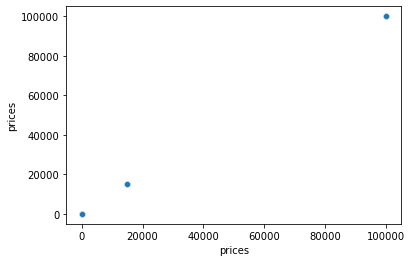

In [17]:
# Creating scatterplot to check for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [18]:
# Limiting the max to 100
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

Unnamed: 0  Unnamed: 0_x  order_id  user_id eval_set  order_number  \
10030345    10030345          1576    912404       17    prior            12   
10030346    10030346          1638    603376       17    prior            22   
10030347    10030347         16534   3264360      135    prior             2   
10030348    10030348         16540    892534      135    prior             3   
10030349    10030349         53711    229704      342    prior             8   
...              ...           ...       ...      ...      ...           ...   
29166209    29166209      32109300   2249946   204099    prior            29   
29166210    29166210      32109317   2363282   204099    prior            31   
29166211    29166211      32155162   3181945   204395    prior            13   
29166212    29166212      32284597   2486215   205227    prior             7   
29166213    29166213      32284651   2232716   205227    prior            10   

          order_dow  order_hour_of_day  days_since_prior_order  product_id  \
10030345          2                 14                     5.0       21553   
10030346          6                 16                     4.0       21553   
10030347          2                 21                    13.0       21553   
10030348          0                  8                    12.0       21553   
10030349          1                 19                    30.0       21553   
...             ...                ...                     ...         ...   
29166209          0                  8                     4.0       33664   
29166210          0                  9                     2.0       33664   
29166211          3                 15                     8.0       33664   
29166212          3                 20                     4.0       33664   
29166213          0                 11                     4.0       33664   

          add_to_cart_order  reordered _merge  Unnamed: 0_y  \
10030345                  5          0   both         21554   
10030346                  3          1   both         21554   
10030347                  6          0   both         21554   
10030348                  3          1   both         21554   
10030349                  9          0   both         21554   
...                     ...        ...    ...           ...   
29166209                  1          0   both         33666   
29166210                  1          1   both         33666   
29166211                 25          0   both         33666   
29166212                  8          0   both         33666   
29166213                 23          1   both         33666   

                              product_name  aisle_id  department_id   prices  
10030345  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0  
10030346  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0  
10030347  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0  
10030348  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0  
10030349  Lowfat 2% Milkfat Cottage Cheese       108             16  14900.0  
...                                    ...       ...            ...      ...  
29166209             2 % Reduced Fat  Milk        84             16  99999.0  
29166210             2 % Reduced Fat  Milk        84             16  99999.0  
29166211             2 % Reduced Fat  Milk        84             16  99999.0  
29166212             2 % Reduced Fat  Milk        84             16  99999.0  
29166213             2 % Reduced Fat  Milk        84             16  99999.0  

[5127 rows x 18 columns]

In [19]:
# Turning outliers into nan
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [20]:
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

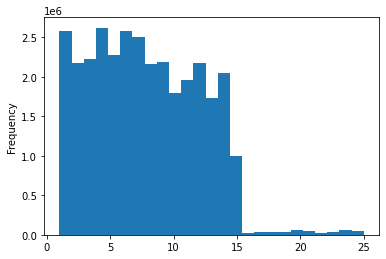

In [21]:
ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:ylabel='Frequency'>

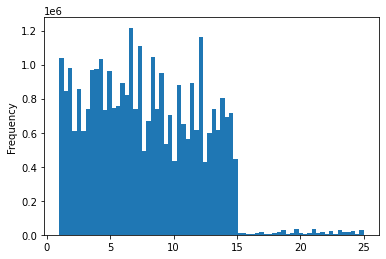

In [22]:
ords_prods_merge['prices'].plot.hist(bins = 70)

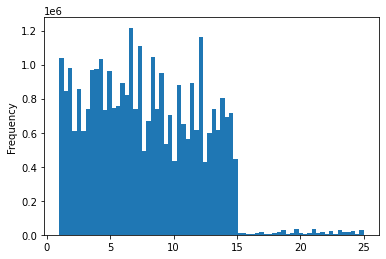

In [24]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [26]:
# Exporting the histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

5. Creating line graph

In [27]:
# Creat list holding true/false value to the test np.random.rant(0.7)
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
# Store 70% in df - big
big = ords_prods_merge[dev]

In [29]:
# Store 30% in df - small
small = ords_prods_merge[~dev]

In [31]:
# Reducing sample to only necessary column
df_2 = small[['order_dow','prices']]

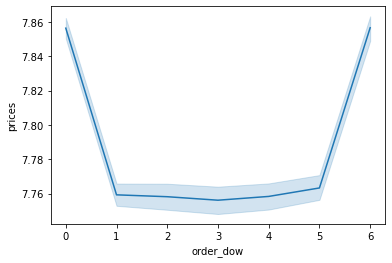

In [32]:
# Creating line chart
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')